In [1]:
import os
import time
import requests
import pandas as pd
import datetime as dt

In [2]:
# Make everything lowercase

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/My Drive/Personal/Projects/DepressionCounselorBot"

/content/drive/My Drive/Personal/Projects/DepressionCounselorBot


In [18]:
df = pd.read_csv("./submission_comment_score_pairs.csv", lineterminator='\n')
# df = pd.read_csv("./english_french.csv", lineterminator='\n')

In [7]:
df.head()

,Submission,Comment,SubmissionScore,CommentScore,Subreddit
0,"Dogs. If youre prone to depression like I am, ...",Theres that joke about locking someone and a d...,38,1,depression
1,"Reddit, Help me Im depressed because I feel ho...","Not sure if this means much now, but you guys ...",12,1,depression
2,Heartbroken for the second time this year. My ...,Im going through a similar type of breakup. We...,8,2,depression
3,Seroquel XR experiences? Due to a combination ...,Dry throat. Horrible nightmares.,3,1,depression
4,"What works for me, hoping this will help someo...",All good advice! There is another piece to the...,14,3,depression


In [6]:
len(df)

88813

In [ ]:
df = df[['Submission', 'Comment', 'SubmissionScore', 'CommentScore']]

In [ ]:
df.columns = ['Submission', 'Comment', 'SubmissionScore', 'CommentScore']

## Make Lowercase

In [ ]:
#

## Delete Duplicates

In [ ]:
df = df.drop_duplicates(subset='Submission', keep="first")

In [ ]:
len(df)

42735

## Max Length

In [ ]:
df = (df[df['Submission'].apply(lambda x: len(x.split(' ')) < 200)])
df = (df[df['Comment'].apply(lambda x: len(x.split(' ')) < 200)])

In [ ]:
len(df)

21112

## Remove Links

In [ ]:
import re

df['Submission'] = df['Submission'].str.replace('http\S+|www.\S+', '', case=False)
df['Comment'] = df['Comment'].str.replace('http\S+|www.\S+', '', case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
df.iloc[0]["Comment"]

'It has been 2 months since your post. Are you still alive?'

## Remove Special Characters

In [19]:
df['Submission'] = df['Submission'].str.replace("'", '')
df['Comment'] = df['Comment'].str.replace("'", '')

## Remove Nan

In [ ]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(how='any', subset=["Submission", "Comment"], inplace=True)

In [ ]:
len(df)

42674

## Split Train Val

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
train.to_csv("train_submission_comment_score_pairs.csv")
test.to_csv("test_submission_comment_score_pairs.csv")

## Get Length Frequencies

In [ ]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import spacy

spacy_en = spacy.load("en")


In [ ]:

submission_lens = []
comment_lens = []

for submission in df['Submission']:
  submission_lens.append(len([tok.text.lower() for tok in spacy_en.tokenizer(submission)]))

for comment in df['Comment']:
  comment_lens.append(len([tok.text.lower() for tok in spacy_en.tokenizer(comment)]))

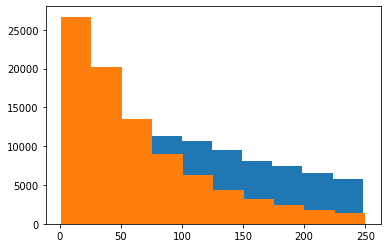

In [ ]:
plt.hist(submission_lens)
plt.hist(comment_lens)
plt.show()

In [ ]:
count = 0

for submission_len in submission_lens:
  if submission_len > 247:
    count += 1

print(count)

18


In [ ]:
len(df)

43719

In [25]:
# df = df.drop(len([tok.text.lower() for tok in spacy_en.tokenizer(df.Submission)]) > 248)

# df = df.drop(df[]) > 248].index)

for index, row in df.iterrows():
  if len([tok.text.lower() for tok in spacy_en.tokenizer(row['Submission'])]) > 246:
    df.drop(index, inplace=True)

In [26]:
for index, row in df.iterrows():
  if len([tok.text.lower() for tok in spacy_en.tokenizer(row['Comment'])]) > 246:
    df.drop(index, inplace=True)

In [27]:
len(df)

88279

In [ ]:
# Remove ' in words
# Put dots after every submission/comment

In [20]:
for index, row in df.iterrows():
  if row['Submission'][-1] == '.' or row['Submission'][-1] == '!' or row['Submission'][-1] == '?':
    pass
  else:
    row['Submission'] = row['Submission'] + '.'

In [21]:
for index, row in df.iterrows():
  if row['Comment'][-1] == '.' or row['Comment'][-1] == '!' or row['Comment'][-1] == '?':
    pass
  else:
    row['Comment'] = row['Comment'] + '.'

## Save Dataframe

In [28]:
df.to_csv("clean_submission_comment_pairs.csv", index=False)

In [ ]:
len(df)

814

In [ ]:
depression = pd.read_csv('./clean_submission_comment_score_pairs_depression.csv', lineterminator='\n')
depression_help = pd.read_csv('./clean_submission_comment_score_pairs_depression_help.csv', lineterminator='\n')
suicide_watch = pd.read_csv('./clean_submission_comment_score_pairs_suicide_watch.csv', lineterminator='\n') 

In [ ]:
depression['Subreddit'] = 'depression'
depression_help['Subreddit'] = 'depression_help'
suicide_watch['Subreddit'] = 'suicide_watch'

,Submission,Comment,SubmissionScore,CommentScore,Subreddit
0,"Dogs. If youre prone to depression like I am, ...",Theres that joke about locking someone and a d...,38,1,depression
1,"Reddit, Help me Im depressed because I feel ho...","Not sure if this means much now, but you guys ...",12,1,depression
2,Heartbroken for the second time this year. My ...,Im going through a similar type of breakup. We...,8,2,depression
3,Seroquel XR experiences? Due to a combination ...,Dry throat. Horrible nightmares.,3,1,depression
4,"What works for me, hoping this will help someo...",All good advice! There is another piece to the...,14,3,depression


In [ ]:
len(depression)

43719

In [ ]:
depression = depression.append(depression_help)
depression = depression.append(suicide_watch)

In [ ]:
depression.to_csv('submission_comment_score_pairs.csv', index=False)

In [ ]:
df.iloc[138]['Submission']

'Struggling to cope. 1 step forward, 2 steps back.  Seems to be a recurring pattern in my life, just wish I had the power to change everything.'